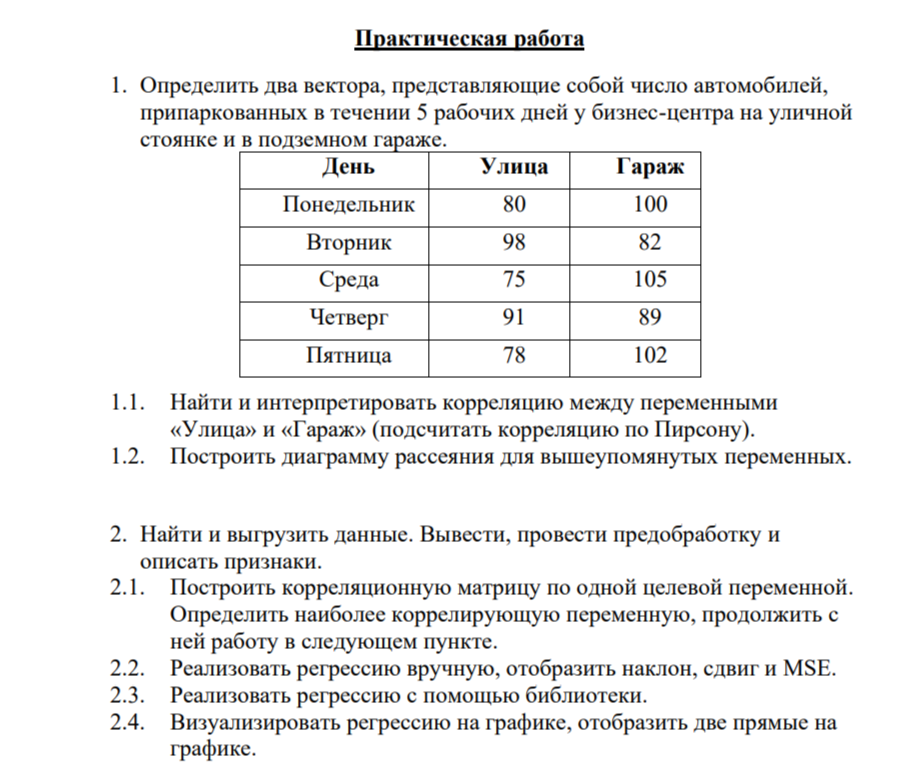

## **Задание 1**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
street = np.array([80, 98, 75, 91, 78])
garage = np.array([100, 82, 105, 89, 102])

correlation = np.corrcoef(street, garage)[0, 1]
print(f"Коэффициент корреляции Пирсона: {correlation}")

#Коэффициент корреляции практически равен –1, что означает сильную отрицательную корреляцию.

Коэффициент корреляции Пирсона: -0.9999999999999998


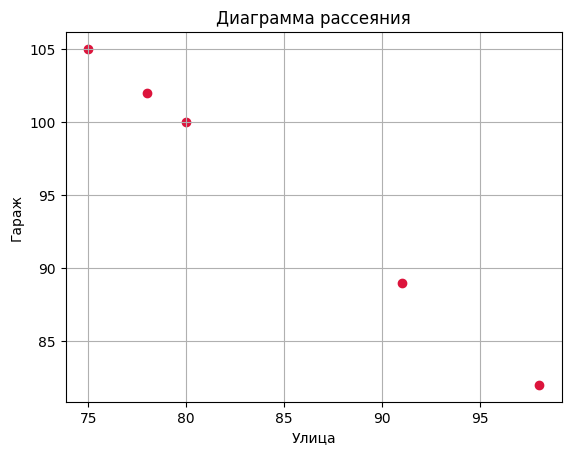

In [ ]:
plt.scatter(street, garage, color='crimson')
plt.title('Диаграмма рассеяния')
plt.xlabel('Улица')
plt.ylabel('Гараж')
plt.grid(True)
plt.show()

## **Задание 2**

### **2.1.**

In [ ]:
df = pd.read_csv('housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df_numeric = df.drop('Address', axis=1)

Описание признаков

Avg. Area Income: Средний доход жителей района.

Avg. Area House Age: Средний возраст домов.

Avg. Area Number of Rooms: Среднее кол-во комнат.

Area Population: Население района.

Price: Целевая переменная ($y$) — цена дома.

In [ ]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [ ]:
df_numeric.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [ ]:
df_numeric = df_numeric.dropna()
df_numeric.isnull().sum()

,0
Avg. Area Income,0
Avg. Area House Age,0
Avg. Area Number of Rooms,0
Avg. Area Number of Bedrooms,0
Area Population,0
Price,0


In [ ]:
df_numeric.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [ ]:
corr = df_numeric.corr()

In [ ]:
# Строим корреляцию всех признаков относительно Price
# Сортируем по убыванию, чтобы сразу видеть самые важные признаки
corr = df_numeric.corr()[['Price']].sort_values(by='Price', ascending=False)

# 3. Визуализация с градиентом
corr.style.background_gradient(cmap='coolwarm')

,Price
Price,1.000000
Avg. Area Income,0.639734
Avg. Area House Age,0.452543
Area Population,0.408556
Avg. Area Number of Rooms,0.335664
Avg. Area Number of Bedrooms,0.171071


**определим наиболее коррелирующую переменную**

In [ ]:
# Находим наиболее коррелирующую переменную (исключая саму Price)
# Мы берем абсолютные значения, так как сильная отрицательная корреляция тоже важна
best_feature = df_numeric.corr()['Price'].drop('Price').idxmax()
best_feature = df_numeric.corr()['Price'].drop('Price').idxmax()
best_value = df_numeric.corr()['Price'].drop('Price').max()

print(f"Наиболее коррелирующая переменная: {best_feature}")
print(f"Значение корреляции Пирсона: {best_value:.4f}")

Наиболее коррелирующая переменная: Avg. Area Income
Значение корреляции Пирсона: 0.6397


### **2.2. Реализация регрессии вручную**

In [ ]:
# Подготовка данных
X = df[['Avg. Area Income']]
y = df['Price']

# Преобразование в numpy массивы (float)
X = np.array(X, dtype=float)
y = np.array(y, dtype=float)

# 1. Функция ошибки MSE
def mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    return np.sum((y - y_pred) ** 2) / len(y)

# 2. Функция градиента
def gr_mserror(X, w1, w0, y):
    y_pred = w1 * X[:, 0] + w0
    # Производная по w0 (сдвиг)
    dw0 = 2/len(X) * np.sum(y_pred - y)
    # Производная по w1 (наклон)
    dw1 = 2/len(X) * np.sum((y_pred - y) * X[:, 0])
    return np.array([dw0, dw1])

# 3. Градиентный спуск
w1, w0 = 0.0, 0.0 # Начальные веса
learning_rate = 1e-10 # Очень маленький шаг, так как данные не масштабированы
iterations = 1000

for i in range(iterations):
    grad = gr_mserror(X, w1, w0, y)
    w0 = w0 - learning_rate * grad[0]
    w1 = w1 - learning_rate * grad[1]

    # Печатаем ошибку каждые 200 шагов для контроля
    if i % 200 == 0:
        print(f"Iteration {i}: MSE = {mserror(X, w1, w0, y):.2f}")

print(f"\nИтоговые веса: наклон (w1) = {w1:.4f}, сдвиг (w0) = {w0:.4f}")
print(f"Финальный MSE = {mserror(X, w1, w0, y):.2f}")

Iteration 0: MSE = 76898824535.85
Iteration 200: MSE = 74803456937.44
Iteration 400: MSE = 74803456935.26
Iteration 600: MSE = 74803456933.07
Iteration 800: MSE = 74803456930.89

Итоговые веса: наклон (w1) = 18.0408, сдвиг (w0) = -0.0008
Финальный MSE = 74803456928.72


In [ ]:
# 1. Масштабирование данных (Standardization)
# Это критически важно для градиентного спуска!
X_mean, X_std = X.mean(), X.std()
y_mean, y_std = y.mean(), y.std()

X_scaled = (X - X_mean) / X_std
y_scaled = (y - y_mean) / y_std

# 2. Инициализация
eps = 0.000001
w1, w0 = 0.0, 0.0
learning_rate = 0.1
next_w1, next_w0 = w1, w0
n = 100000

for i in range(n):
    cur_w1, cur_w0 = next_w1, next_w0

    # Используем функцию градиента на масштабированных данных
    grad = gr_mserror(X_scaled, cur_w1, cur_w0, y_scaled)

    next_w0 = cur_w0 - learning_rate * grad[0]
    next_w1 = cur_w1 - learning_rate * grad[1]

    # Проверка на сходимость
    if (abs(cur_w1 - next_w1) <= eps) and (abs(cur_w0 - next_w0) <= eps):
        print(f"Алгоритм сошелся за {i} итераций")
        break

# 3. Возвращаем веса к исходному масштабу
final_w1 = next_w1 * (y_std / X_std)
final_w0 = y_mean - final_w1 * X_mean

print(f"Итоговый наклон (w1): {final_w1}")
print(f"Итоговый сдвиг (w0): {final_w0}")

Алгоритм сошелся за 53 итераций
Итоговый наклон (w1): 21.1953592632801
Итоговый сдвиг (w0): -221570.9801626373


наклон = 41837

сдвиг = 44906

MSE 7011035574

### **2.3. и 2.4 Реализация регрессии с помощью библиотеки sklearn и Визуализация регрессии**

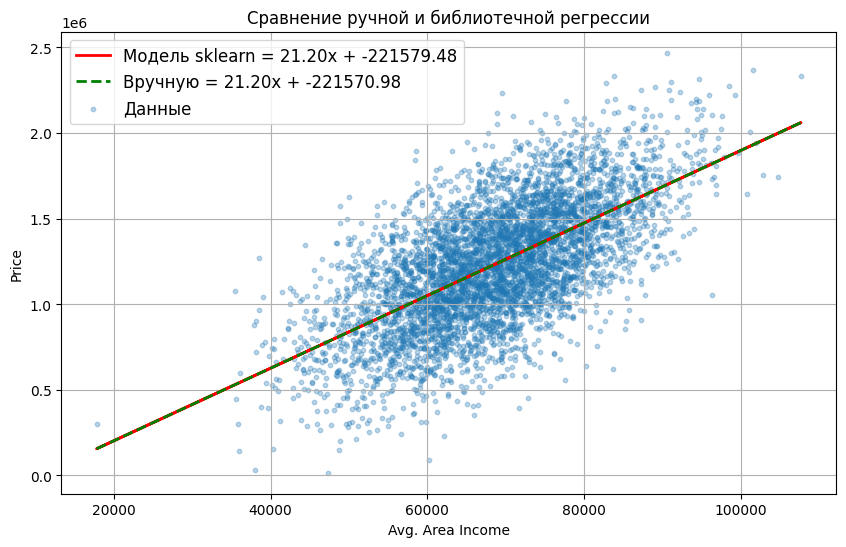

In [ ]:
from sklearn.linear_model import LinearRegression

# 1. Подготовка данных (sklearn)
# Используем те же переменные, что и в ручном методе
X_sk = np.array(df[['Avg. Area Income']], dtype=float)
y_sk = np.array(df['Price'], dtype=float)

# Обучение модели
model = LinearRegression()
model.fit(X_sk, y_sk)

# Получаем коэффициенты из sklearn
model_a = model.coef_[0]
model_b = model.intercept_
model_y_sk = model.predict(X_sk)

# 2. Визуализация регрессии
fig = plt.figure(figsize=(10, 6))

# Создаем диапазон x для ручной модели (от мин до макс дохода в данных)
x_range = np.linspace(X_sk.min(), X_sk.max(), 100)
# Используем веса из ручного градиентного спуска (final_w1 и final_w0)
our_model_y = final_w1 * x_range + final_w0

# Отрисовка линии sklearn
plt.plot(X_sk, model_y_sk, linewidth=2, color="r",
         label=f'Модель sklearn = {model_a:.2f}x + {model_b:.2f}')

# Отрисовка линии вручную
plt.plot(x_range, our_model_y, '--g', linewidth=2,
         label=f'Вручную = {final_w1:.2f}x + {final_w0:.2f}')

# Точки данных
plt.scatter(X_sk, y_sk, alpha=0.3, s=10, label='Данные')

plt.grid()
plt.xlabel('Avg. Area Income')
plt.ylabel('Price')
plt.title('Сравнение ручной и библиотечной регрессии')
plt.legend(prop={'size': 12})
plt.show()